In [ ]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Read data
Heloc = pd.read_csv("HelocData.csv")

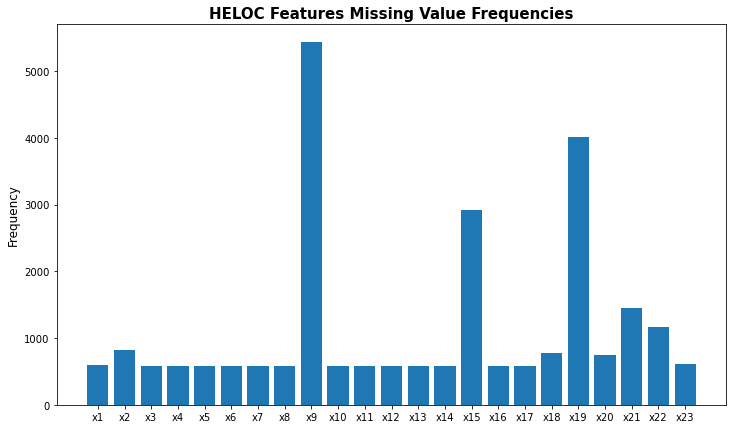

In [ ]:
''' 
Visualize the missing values (negative values -7, -8, -9) for each variable
'''
# Count frequencies of -7, -8 and -9 in each feature
count = Heloc.iloc[:,1:].apply(pd.value_counts).loc[[-7, -8, -9]]

# Sum of all negative values in each column\
Sum = count.sum(axis=0)

# Visualize by bar chart
plt.figure(figsize = (12, 7))
plt.bar(Sum.index, Sum)
plt.title("HELOC Features Missing Value Frequencies", fontsize = 15, fontweight = "bold")
plt.ylabel("Frequency", fontsize = 12)
plt.show()

In [ ]:
# Split the data into training (80%) and testing (20%) sets

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# Set random seed
np.random.seed(3035480699)
df_train, df_test = train_test_split(Heloc, test_size = 0.2)

# Replace -7, -8, -9 with feature means
df_train.replace([-7, -8, -9], np.nan, inplace=True)
fill_NaN = SimpleImputer(missing_values=np.nan, strategy='mean')
fill_NaN = fill_NaN.fit(df_train.iloc[:,1:])
df_train.iloc[:,1:] = fill_NaN.transform(df_train.iloc[:,1:])
df_train

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,RiskFlag,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
6240,Bad,62.0,377.0,5.0,86.0,24.0,3.0,2.0,92.0,15.000000,...,27.0,11.000000,0.0,0.0,70.0,76.000000,9.0,4.0,4.000000,68.0
10003,Bad,65.0,77.0,13.0,52.0,11.0,3.0,3.0,83.0,44.000000,...,58.0,0.000000,0.0,0.0,71.0,68.425005,2.0,1.0,2.000000,60.0
3728,Bad,59.0,146.0,5.0,60.0,21.0,0.0,0.0,91.0,2.000000,...,68.0,0.000000,4.0,4.0,34.0,46.000000,2.0,4.0,2.000000,75.0
9678,Good,80.0,139.0,1.0,40.0,12.0,0.0,0.0,100.0,21.941279,...,36.0,2.000000,5.0,5.0,19.0,97.000000,5.0,2.0,0.000000,88.0
2309,Bad,72.0,365.0,11.0,83.0,22.0,0.0,0.0,100.0,21.941279,...,41.0,0.000000,0.0,0.0,49.0,23.000000,6.0,2.0,1.000000,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5661,Bad,71.0,175.0,8.0,46.0,14.0,0.0,0.0,93.0,25.000000,...,57.0,0.000000,1.0,1.0,76.0,68.425005,2.0,2.0,0.000000,80.0
8826,Good,87.0,193.0,20.0,77.0,6.0,0.0,0.0,100.0,21.941279,...,67.0,2.520113,0.0,0.0,0.0,19.000000,0.0,1.0,0.000000,50.0
5765,Good,78.0,220.0,9.0,86.0,41.0,0.0,0.0,100.0,21.941279,...,20.0,1.000000,2.0,2.0,5.0,68.425005,4.0,2.0,1.000000,50.0
3820,Good,74.0,158.0,2.0,58.0,36.0,1.0,1.0,97.0,21.941279,...,45.0,0.000000,0.0,0.0,0.0,92.000000,1.0,3.0,1.099785,57.0


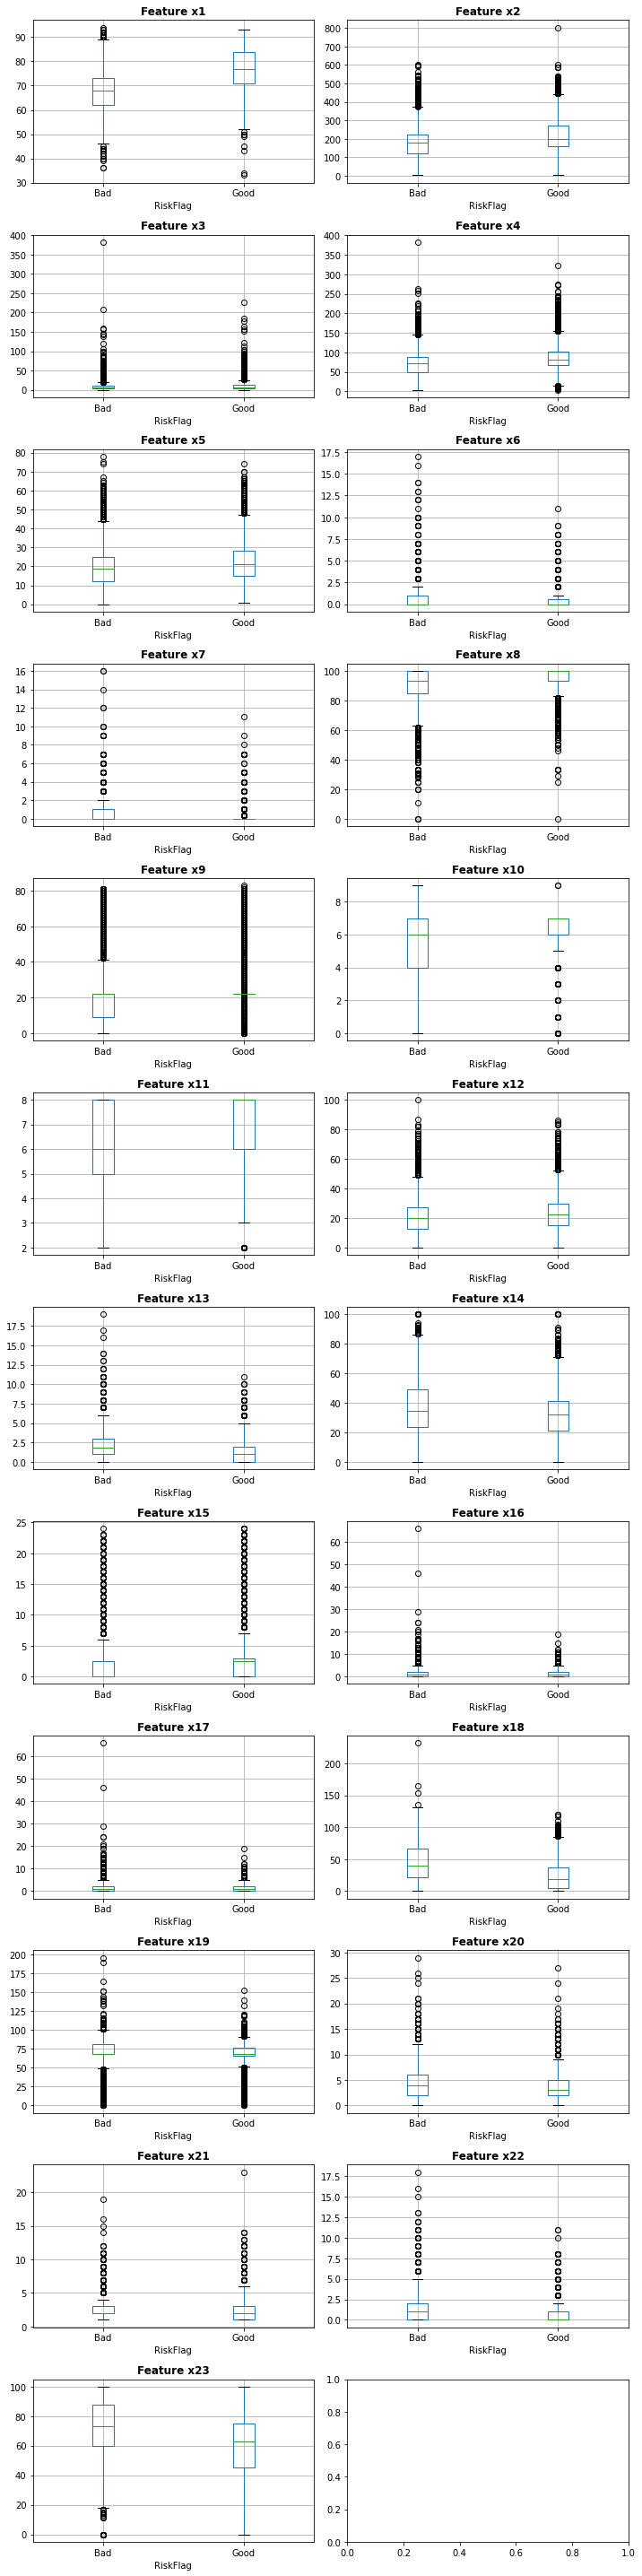

In [ ]:
# Boxplot for each feature variable as grouped by RiskFlag
import math
n = 2 #number of plot per row
features = df_train.iloc[:,1:].columns
fig, axes = plt.subplots(math.ceil(len(features)/n),n, figsize = (10,40))
for i, feature in enumerate(features):
    plt.subplot(axes[i//n,i%n])
    df_train.boxplot(column = feature, by = "RiskFlag", ax = axes[i//n,i%n])
    plt.title("Feature " + feature, fontsize = 12, fontweight = "bold")
fig.suptitle('')
fig.tight_layout()
plt.show()

In [ ]:
# Logistic Regression of top-5 features
from sklearn.linear_model import LogisticRegression
Z_train_top5 = df_train[["x1", "x10", "x11", "x15", "x22"]]
y_train = df_train.iloc[:,0]
y_train.replace("Bad", 0, inplace = True) # replace RiskFlag into binary values
y_train.replace("Good", 1, inplace = True)
logreg = LogisticRegression(C=1e8, solver='newton-cg')
logreg.fit(Z_train_top5, y_train)
betahat = np.append(np.array(logreg.intercept_),logreg.coef_)
print("Logistic Regression of top-5 features: \nIntercept: {}, Coefficients: {}".format(np.round(logreg.intercept_, 4), np.round(logreg.coef_, 4)))

# Wald test
# Standard error of betahat
n, p = Z_train_top5.shape
X_train_top5 = np.hstack((np.ones((n,1)),Z_train_top5))
y_pred = logreg.predict(Z_train_top5)
sse = np.sum((y_train - y_pred)**2)
sig2hat = sse/(n-p-1)
stderr = np.sqrt(sig2hat*np.linalg.inv(np.dot(X_train_top5.T, X_train_top5)).diagonal())
tstat = betahat/stderr
print("t-statistic:\n{}".format(tstat))

Logistic Regression of top-5 features: 
Intercept: [-7.6279], Coefficients: [[ 0.1041 -0.0284  0.0116  0.0642 -0.0547]]
t-statistic:
[-138.48347361  112.60250231   -5.48051134    2.64047597   43.00900448
  -11.20543325]


The null hypothesis of Wald test is $\mathbf{\beta_j} = 0$. The closer the t-statistic of a feature is to zero, the stronger it suggests that removing the feature will not have a big influence in the model fitness. From the above t-statistic results, the descending order of variable importance is: x1, x15, x22, x10, x11.

In logistic regression, the generalized linear model is a logit link function that links the intercept, coefficients and corresponding features to the log odds-ratio $log(\dfrac{\mathbf{\mu(x)}}{{1-\mathbf{\mu(x)}}})$, where $\mathbf{\mu(x)} = P(Y=1|X=x)$. A positive log odds-ratio suggest a higher likelihood that $Y = 1$ rather than $Y = 0$ and vice versa. Also, a unit increase in $x_j$ with other features fixed increases the log odds-ratio by the coefficient $\mathbf{\beta_j}$

The coefficients for features x1, x10, x11, x15 and x22 are 0.1041, -0.0284, 0.0116, 0.0642 and -0.0547 respectively. It indicates that x1, x11 and x15 are positively correlated to the likelihood of $Y = 1$ than $Y = 0$ while x10 and x22 suggest the opposite.


Put it into context, $Y = 1$ represents a good loan-borrowing record while $Y = 0$ represents a record of 90-day delinquent loan over a two-year period. x1 is a consolidated version of risk markers; x11 is the maximum delinquency ever, value increases as the duration of delinquency decreases; x15 is the number of months since the most recent Inq excl 7days. The increase in these values is an indicator of higher chance of loan repayment. While x10 is the maximum delinquency in the last 12 months, value decreases with the duration of delinquency; x22 is the number of banks/Natl trades with high utilization ratio. Increase in these values post an increased risk of loan delinquency.

In [ ]:
# Prediction accuracy
from sklearn.metrics import accuracy_score
# Prediction by logistic regression
z_test_top5 = df_test[["x1", "x10", "x11", "x15", "x22"]]
y_test = df_test.iloc[:,0]
y_test.replace("Bad", 0, inplace = True) # replace RiskFlag into binary values
y_test.replace("Good", 1, inplace = True)
y_pred_test = logreg.predict(z_test_top5)
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy on the test set =', np.round(accuracy,4))

Accuracy on the test set = 0.7108


The logistic regression model correctly predicted 71% of the test cases.